<a href="https://colab.research.google.com/github/fimoziq/unecozik/blob/main/ibm451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from pandas import read_csv
series = read_csv('ibm.csv',parse_dates = True, index_col = 0,delimiter=',',decimal=',')
series.head()

,price
date,
2008-07-11,86.27
2008-11-14,80.33
2008-11-21,74.88
2008-11-28,81.60
2008-05-12,80.59


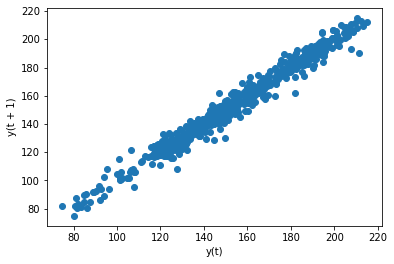

In [9]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
lag_plot(series)
pyplot.show()

In [10]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

            t       t+1
t    1.000000  0.987897
t+1  0.987897  1.000000


Мы можем рассчитать коэффициент корреляции для каждой лаговой переменной. Это может очень быстро дать представление о том, какие лаговые переменные могут быть хорошими кандидатами для использования в прогнозной модели и как с течением времени меняются отношения между наблюдением и его историческими значениями.

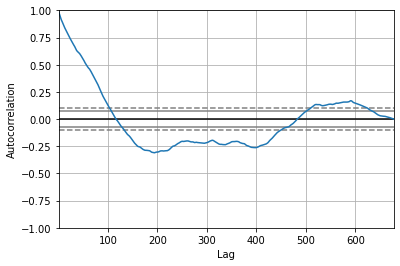

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


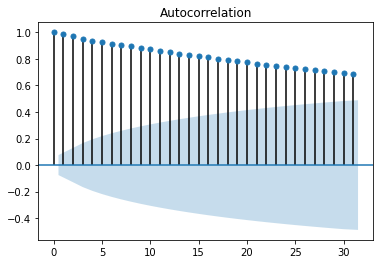

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()

Test RMSE: 6.717


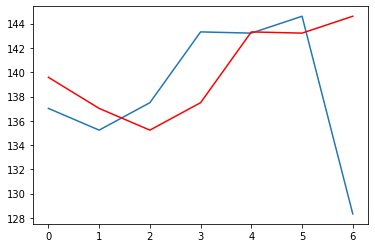

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

            price
date             
2008-07-11  86.27
2008-11-14  80.33
2008-11-21  74.88
2008-11-28  81.60
2008-05-12  80.59


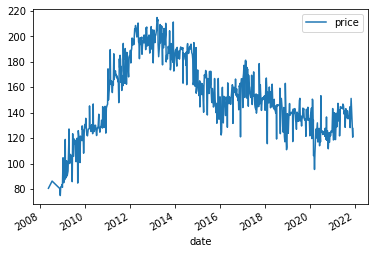

In [14]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
print(series.head())
series.plot()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  676
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1965.166
Method:                       css-mle   S.D. of innovations              4.428
Date:                Sat, 23 Oct 2021   AIC                           3944.333
Time:                        10:11:54   BIC                           3975.946
Sample:                             1   HQIC                          3956.573
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0670      0.132      0.507      0.612      -0.192       0.326
ar.L1.D.price    -0.0772      0.038     -2.006      0.045      -0.153      -0.002
ar.L2.D.price     0.0403      0.039     

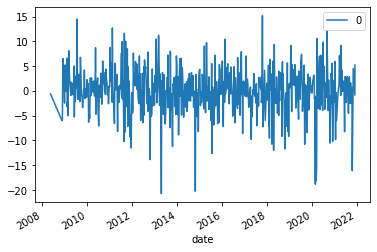

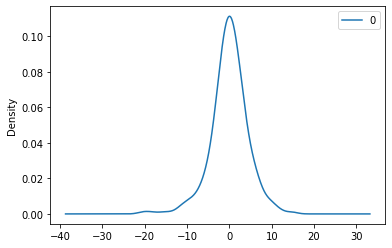

                0
count  676.000000
mean    -0.001784
std      4.432120
min    -20.728766
25%     -2.209949
50%      0.131279
75%      2.526317
max     15.224931


In [17]:
from statsmodels.tsa.arima_model import ARIMA
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=152.992302, expected=152.490000
predicted=152.876894, expected=152.050000
predicted=153.161409, expected=154.100000
predicted=154.520631, expected=155.380000
predicted=155.216602, expected=154.110000
predicted=154.424207, expected=153.830000
predicted=154.006209, expected=152.940000
predicted=152.898096, expected=154.240000
predicted=154.236465, expected=147.080000
predicted=148.128623, expected=144.290000
predicted=144.881537, expected=145.160000
predicted=145.171899, expected=141.840000
predicted=142.546223, expected=139.700000
predicted=141.049026, expected=143.740000
predicted=143.714458, expected=144.080000
predicted=144.229573, expected=142.450000
predicted=143.346859, expected=144.820000
predicted=144.780975, expected=145.130000
predicted=144.727561, expected=145.080000
predicted=145.347492, expected=146.480000
predicted=146.565421, expected=147.100000
predicted=146.904589, expected=162.070000
predicted=160.795557, expected=153.680000
predicted=154.638682, expected=151

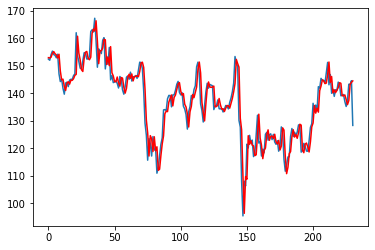

In [18]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()